In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

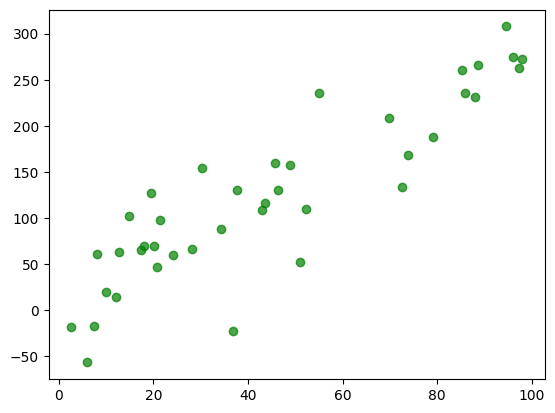

In [3]:
# experiment with different values for y

np.random.seed(42)

x = np.sort(np.random.choice(np.linspace(0, 100, 150), size=40, replace=False)).reshape(-1, 1)
y = 3 * x.squeeze() + np.random.normal(0, 50, x.shape[0]) 
plt.scatter(x, y, color='green', alpha=0.7)

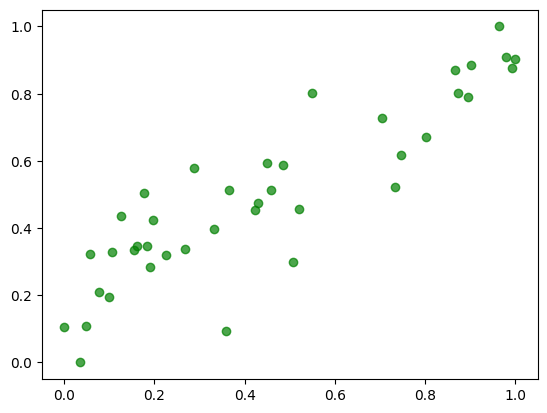

In [5]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
x_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
plt.scatter(x_scaled, y_scaled, color='green', alpha=0.7)

### Linear regression with and without regularization

TODO: 
- experiment with x or x_scaled
- experiment with different values of alpha

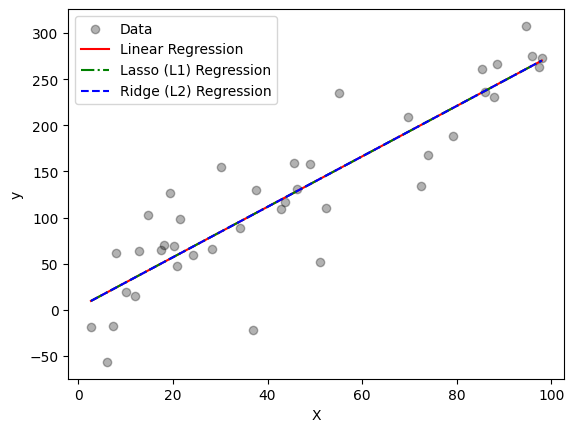

In [6]:
lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)
lasso_reg = Lasso(alpha=0.5).fit(x.reshape(-1, 1), y) # Linear regression with L1
ridge_reg = Ridge(alpha=0.5).fit(x.reshape(-1, 1), y) # Linear regression with L2

# Prediction
X_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_lin = lin_reg.predict(X_line)
y_ridge = ridge_reg.predict(X_line)
y_lasso = lasso_reg.predict(X_line)

# Plot
plt.scatter(x, y, color='black', label='Data', alpha=0.3)
plt.plot(X_line, y_lin, 'r-', label='Linear Regression')
plt.plot(X_line, y_lasso, 'g-.', label='Lasso (L1) Regression')
plt.plot(X_line, y_ridge, 'b--', label='Ridge (L2) Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Linear regression with polynomial fit and without regularization

TODO: 
- same as above
- adjust degree of target polynomial
- adjust generation of y as function of x (see 2nd cell)

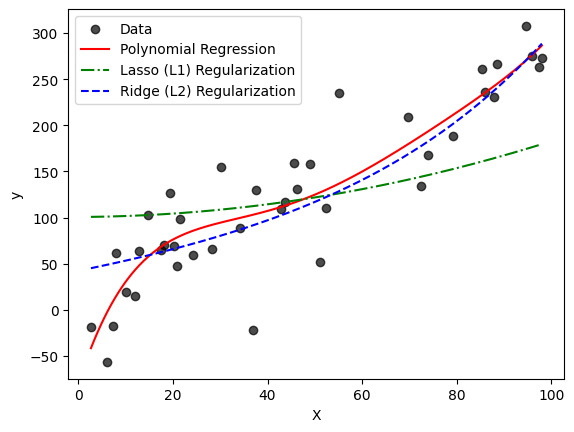

In [7]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(x_scaled)

# Fit polynomial regression
lin_reg = LinearRegression().fit(X_poly, y_scaled)
ridge_reg = Ridge(alpha=0.999).fit(X_poly, y_scaled)
lasso_reg = Lasso(alpha=0.05).fit(X_poly, y_scaled)

# Prepare points for smooth curve
X_line = np.linspace(x_scaled.min(), x_scaled.max(), 400).reshape(-1, 1)
X_line_poly = poly.transform(X_line)

# Predict
y_lin_scaled = lin_reg.predict(X_line_poly)
y_ridge_scaled = ridge_reg.predict(X_line_poly)
y_lasso_scaled = lasso_reg.predict(X_line_poly)

# Inverse-transform to original scale
X_line_orig = scaler_X.inverse_transform(X_line)
y_lin = scaler_y.inverse_transform(y_lin_scaled.reshape(-1, 1))
y_ridge = scaler_y.inverse_transform(y_ridge_scaled.reshape(-1, 1))
y_lasso = scaler_y.inverse_transform(y_lasso_scaled.reshape(-1, 1))

# Plot
plt.scatter(x, y, color='black', label='Data', alpha=0.7)
plt.plot(X_line_orig, y_lin, 'r-', label='Polynomial Regression')
plt.plot(X_line_orig, y_lasso, 'g-.', label='Lasso (L1) Regularization')
plt.plot(X_line_orig, y_ridge, 'b--', label='Ridge (L2) Regularization')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()